In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("student_placement_data.csv")

In [17]:
print(df.head())
print(df.shape)

   Student_ID Branch  CGPA  Python  SQL  Excel  Communication Internship  \
0           1   E&TC   8.2       4    3      4              3        Yes   
1           2     CS   7.1       2    1      3              2         No   
2           3     IT   8.8       5    4      5              4        Yes   
3           4   E&TC   6.9       1    1      2              2         No   
4           5     CS   9.1       5    5      4              4        Yes   

           Job_Role Placement_Status  
0      Data Analyst           Placed  
1      Data Analyst       Not Placed  
2  Business Analyst           Placed  
3      Data Analyst       Not Placed  
4      Data Analyst           Placed  
(50, 10)


In [19]:
print(df.columns)

Index(['Student_ID', 'Branch', 'CGPA', 'Python', 'SQL', 'Excel',
       'Communication', 'Internship', 'Job_Role', 'Placement_Status'],
      dtype='object')


In [21]:
print(df.isnull().sum())

Student_ID          0
Branch              0
CGPA                0
Python              0
SQL                 0
Excel               0
Communication       0
Internship          0
Job_Role            0
Placement_Status    0
dtype: int64


In [23]:
placed = df[df["Placement_Status"] == "Placed"]
not_placed = df[df["Placement_Status"] == "Not Placed"]

print("Placed students:", placed.shape[0])
print("Not placed students:", not_placed.shape[0])

Placed students: 29
Not placed students: 21


In [25]:
placed_avg = placed[["Python", "SQL", "Excel", "Communication"]].mean()
not_placed_avg = not_placed[["Python", "SQL", "Excel", "Communication"]].mean()

print("Placed Students Average Skills:\n", placed_avg)
print("\nNot Placed Students Average Skills:\n", not_placed_avg)

Placed Students Average Skills:
 Python           4.137931
SQL              3.517241
Excel            4.137931
Communication    3.827586
dtype: float64

Not Placed Students Average Skills:
 Python           1.285714
SQL              1.285714
Excel            2.380952
Communication    1.761905
dtype: float64


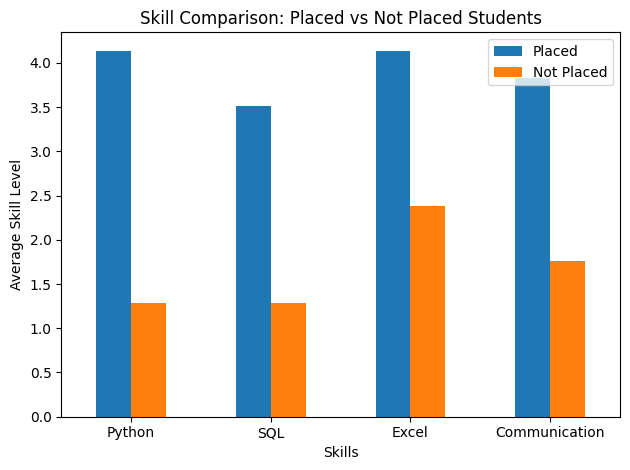

In [27]:
skill_gap = pd.DataFrame({
    "Placed": placed_avg,
    "Not Placed": not_placed_avg
})

skill_gap.plot(kind="bar")
plt.title("Skill Comparison: Placed vs Not Placed Students")
plt.ylabel("Average Skill Level")
plt.xlabel("Skills")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Does CGPA really matter for placement?

In [29]:
placed_cgpa = placed["CGPA"].mean()
not_placed_cgpa = not_placed["CGPA"].mean()

print("Average CGPA (Placed):", round(placed_cgpa, 2))
print("Average CGPA (Not Placed):", round(not_placed_cgpa, 2))

Average CGPA (Placed): 8.41
Average CGPA (Not Placed): 6.84


In [ ]:
# Does CGPA really matter for placement?

In [31]:
internship_impact = pd.crosstab(
    df["Internship"],
    df["Placement_Status"],
    normalize="index"
) * 100

print(internship_impact)

Placement_Status  Not Placed  Placed
Internship                          
No                     100.0     0.0
Yes                      0.0   100.0


In [ ]:
# Visualize Internship Impact 

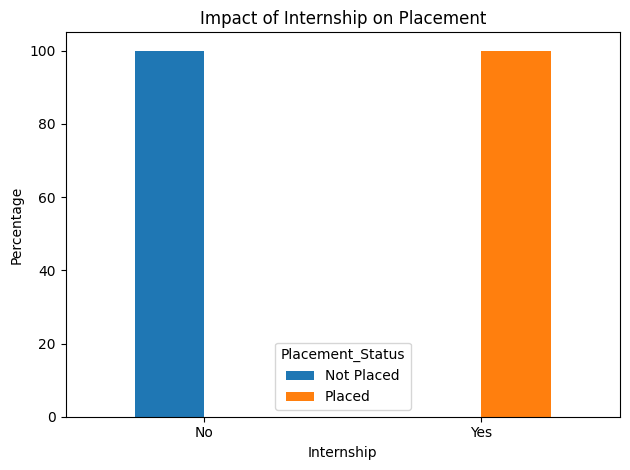

In [33]:
internship_impact.plot(kind="bar")
plt.title("Impact of Internship on Placement")
plt.ylabel("Percentage")
plt.xlabel("Internship")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()